## Robust linear regression
#### Nils Lennier Mattiß, Federica Valeau, Eduard Mihai
#### 2.1
From the following plot we can notice how different are the least square function and the Cauchy function. The first one gives much more importance to the errors while the second one is more robust.

In [57]:
import numpy as np
import matplotlib.pyplot as plt

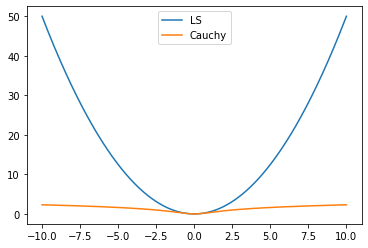

In [58]:
def LS(x):
    return 0.5*x**2

def cauchy(x):
    return 0.5* np.log(1+x**2)

x = np.linspace(-10, 10, 1000)
plt.plot(x, LS(x), label='LS')
plt.plot(x, cauchy(x), label='Cauchy')
plt.legend()
plt.show()


#### 2.2
Now we will find the weights using the Cauchy error function (with c = 1) and by backtracking.

$ Q = \frac{1}{2} \sum_{i=i}^m \log [1+(\hat{y_i}-y_i)^2] =  \frac{1}{2} \sum_{i=i}^m \log [1+(w_0 x_i+w_1-y_i)^2]$

And the partial derivatives will be:

$ \frac{\partial Q}{\partial w_0} = \sum_{i=1}^m \frac{(w_0 x_i+w_1-y_i)x_i}{1+(w_0 x_i+w_1-y_i)^2} \\
\frac{\partial Q}{\partial w_1} = \sum_{i=1}^m \frac{(w_0 x_i+w_1-y_i)}{1+(w_0 x_i+w_1-y_i)^2} \\
\nabla Q(w) = \Big(\frac{\partial Q}{\partial w_0}, \frac{\partial Q}{\partial w_1} \Big)$

The weights will be estimated by the backtraking algorithm

$ w^{k+1} = w^k - \alpha^k \nabla Q(W) $

In [59]:
import numpy as np
import math

m = [0.,0.]
angle = 45*math.pi/180
rot = np.array([[math.cos(angle), -math.sin(angle)], [math.sin(angle),
math.cos(angle)]])
lamb = np.array([[100,0],[0,1]])
s = np.matmul(rot, np.matmul(lamb, rot.transpose()))
points = np.random.multivariate_normal(m,s,100)

In [60]:
# First attempt

def grad(x, points):
    dw0 = []
    dw1 = []
    for i in range(len(points)):
        dw0.append(points[i, 0]*(x[0]*points[i, 0]+x[1]-points[i, 1])/(1+(x[0]*points[i, 0]+x[1]-points[i, 1])**2))
        dw1.append((x[0]*points[i, 0]+x[1]-points[i, 1])/(1+(x[0]*points[i, 0]+x[1]-points[i, 1])**2))
    return np.array([np.sum(dw0), np.sum(dw1)])

def grad_descent(W, alpha, w_his, points):
  for i in range(1000):
      gr = grad(W, points)
      W = np.subtract(W, np.multiply(alpha, grad(W, points)))
      w_his.append(W)
      diffs = W[0]*points[:,0]+W[1]-points[:,1]
  return w_his

weights = grad_descent([2,8], 0.001, [], points)
print(weights[-1])

[0.9984032  0.00451449]


#### 2.3
First we caclulate the weights using the least squares method, like we did before.

In [61]:
def gradf_2(W,X):
    y= []
    y_hat = []
    for point in X:
        predict = W[0]*point[0]+W[1]
        y_hat.append(predict)
        y.append(point[1])
    y = np.array(y)
    y_hat = np.array(y_hat)
    differences = np.subtract(y_hat, y)
    return np.array([ np.sum(np.multiply(differences,X[:,0])),np.sum(differences) ])


def back_prop(W,X,w_history,alpha = 0.0001,iter=0):
    w_history.append(W)
    W = np.subtract(W,np.multiply(alpha ,gradf_2(W,X)))
    if iter>700:
        w_history.append(W)
        return [len(w_history)-1, w_history]
    else:
        res = back_prop(W,X, w_history,iter=iter+1)
    return res

itera, w_LS = back_prop(np.array([2, 8]),points, [])
print(w_LS[-1])

[1.0099672 0.0430183]


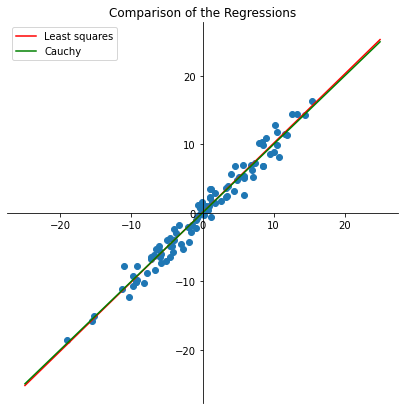

In [62]:
xs = points[:,0]
ys = points[:,1]

fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(xs, ys)
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


x = np. linspace(-25,25,100)
y = w_LS[-1][0]*x+w_LS[-1][1]
z = weights[-1][0]*x+weights[-1][1]
plt. plot(x, y, '-r', label='Least squares')
plt.plot(x, z, '-g', label='Cauchy')
plt. title('Comparison of the Regressions')

plt.legend()
plt.show()


From the plot we can observe that without outliers the obtained regression lines are very similar, in fact by looking at the plots in 2.1, the Cauchy and Least Squares functions assume similar values when they are close to zero, for this reason we expect to see a bigger variation when having several outliers.

#### 2.4
Now we will add 4 more points and we will see how this will impact the regression lines. The points that we will add are (-40, 20), (40, -20), (-20, 40) and (20, -40).

In [70]:
itera, w_LS = back_prop(np.array([2, 8]),np.append(points, [[-40, 20], [40, -20], [-20, 40], [20, -40]], axis=0), [])
print('New weights with outliers for least squares:', w_LS[-1])

weights = grad_descent([2,8], 0.001, [], np.append(points, [[-40, 20], [40, -20], [-20, 40], [20, -40]], axis=0))
print('New weights with outliers for Cauchy:', weights[-1])

New weights with outliers for least squares: [0.22347956 0.06862915]
100
New weights with outliers for Cauchy: [0.99698182 0.00317934]


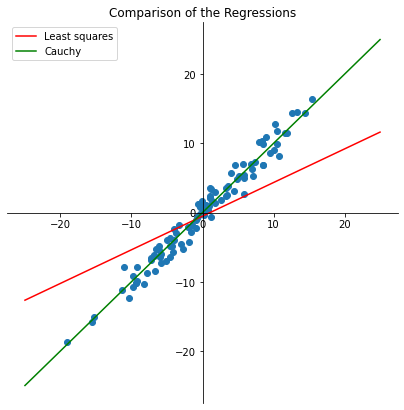

In [68]:
xs = points[:,0]
ys = points[:,1]

fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(xs, ys)
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


x = np. linspace(-25,25,100)
y = w_LS[-1][0]*x+w_LS[-1][1]
z = weights[-1][0]*x+weights[-1][1]
plt. plot(x, y, '-r', label='Least squares')
plt.plot(x, z, '-g', label='Cauchy')
plt. title('Comparison of the Regressions')

plt.legend()
plt.show()


As we can see from the plot, the difference between the two regression lines is quite big; the Cauchy error functin is way more robust against outliers, in fact nonetheless the presence of four outliers, it still gives a very good approximation of the behaviour of the dataset. 

Vice-versa, the least squares approximation doesn't perform good and it gets easily "distracted" by the presence of a few outliers.